In [1]:
!pip install ucimlrepo
# Numpy and Panda to read data and manipulate data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

In [2]:
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# Code to disable python warnings

import warnings

warnings.filterwarnings("ignore")
warnings.warn("DelftStack")
warnings.warn("Do not show this message")
print("No Warning Shown")

No Warning Shown


In [5]:
df=pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')
df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# loading data
data = pd.read_csv('/Users/shaon/Documents/Numpy_Ninja/ML_Assignment/adult/adult.data', header = None)
## reading the data
data.head()
del data

In [7]:
# checking for duplicate values
df.duplicated().sum()

29

In [8]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [9]:
# Let's look at the statistical summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [10]:
# summary of non-numeric columns

df.describe(exclude="number").T

,count,unique,top,freq
workclass,47879,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,47876,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48568,42,United-States,43832
income,48842,4,<=50K,24720


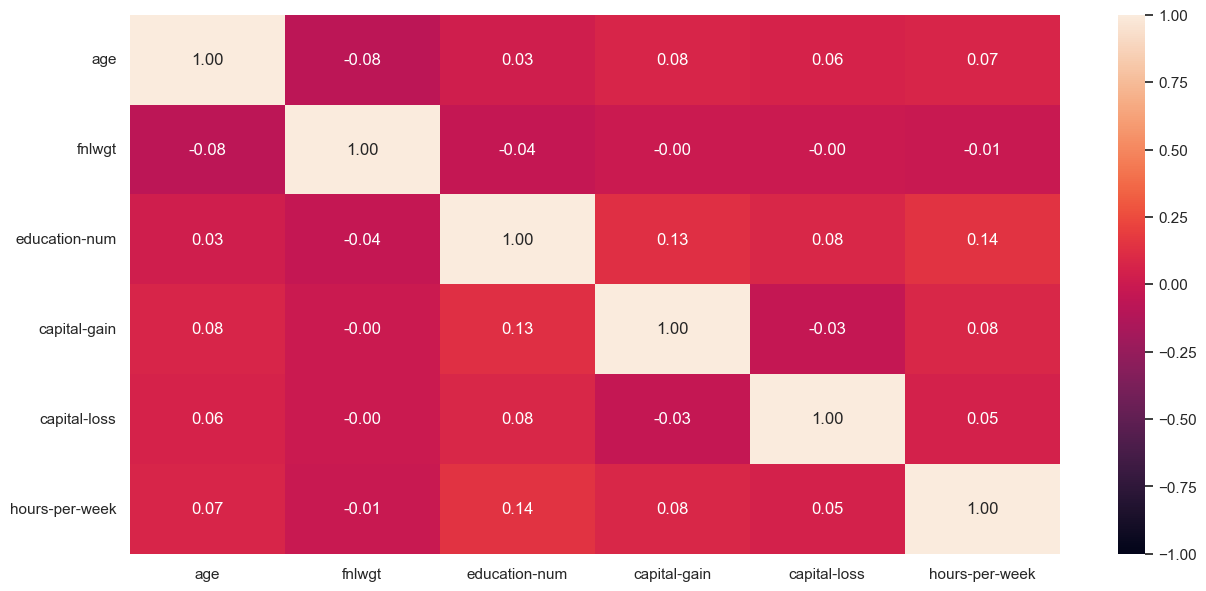

In [11]:
# creating correlation heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",
)
plt.show()

There isn't strong correlation between the different numeric parameters.

# Task 5 - Cleaning

1. There are 4 different types of income due to typing differences.
2. 

In [12]:
import pandas as pd


# Correct the 'income' column by replacing the variations
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Display the cleaned dataframe
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
# summary of non-numeric columns

df.describe(exclude="number").T

,count,unique,top,freq
workclass,47879,9,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,47876,15,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,48568,42,United-States,43832
income,48842,2,<=50K,37155


In [14]:
# Create a dictionary to store unique values for each column
unique_values_dict = {col: df[col].unique() for col in df.columns}

# Convert dictionary to DataFrame for better readability
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))

# Display the unique values DataFrame
print(unique_values_df)

        age         workclass  fnlwgt  education  education-num  \
0      39.0         State-gov   77516  Bachelors           13.0   
1      50.0  Self-emp-not-inc   83311    HS-grad            9.0   
2      38.0           Private  215646       11th            7.0   
3      53.0       Federal-gov  234721    Masters           14.0   
4      28.0         Local-gov  338409        9th            5.0   
...     ...               ...     ...        ...            ...   
28518   NaN               NaN  269623        NaN            NaN   
28519   NaN               NaN  224655        NaN            NaN   
28520   NaN               NaN  173449        NaN            NaN   
28521   NaN               NaN   89686        NaN            NaN   
28522   NaN               NaN  350977        NaN            NaN   

              marital-status         occupation   relationship  \
0              Never-married       Adm-clerical  Not-in-family   
1         Married-civ-spouse    Exec-managerial        Husband 

In [15]:
# TASK - 3 and 4 - hypothesis and statistical tests

In [16]:
### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Income being > or < than 50K is independent of workclass

against the alternate hypothesis

>$H_a:$ Income being > or < than 50K depends on workclass




In [17]:
# Creating a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['income'],df['workclass'],margins=True,margins_name="Total")  

contingency_table

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Total
income,,,,,,,,,,
<=50K,1645,871,2209,10,26519,757,2785,1451,19,36266
>50K,191,561,927,0,7387,938,1077,530,2,11613
Total,1836,1432,3136,10,33906,1695,3862,1981,21,47879


In [18]:
# Lets drop the columns with very low values or irrelevant

In [19]:
contingency_table.drop(columns=['?'], inplace=True)

In [20]:
contingency_table.drop(columns=['Never-worked', 'Without-pay'], inplace=True)

In [21]:
contingency_table

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Total
income,,,,,,,
<=50K,871,2209,26519,757,2785,1451,36266
>50K,561,927,7387,938,1077,530,11613
Total,1432,3136,33906,1695,3862,1981,47879


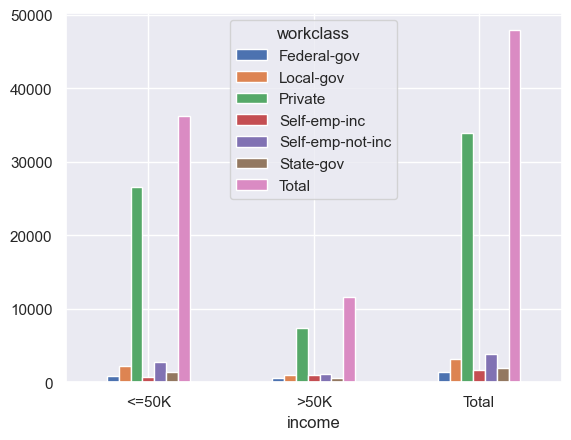

In [22]:
# Plotting a barplot 
contingency_table.plot.bar(rot=0);

In [23]:
# from visual analysis it looks like private jobs dominate both the income levels.

## SELECT APPROPRIATE TEST

### Since this is a problem of the test of independence, concerning two categorical variables - Income status and workclass, we can use Chi square test for independence.

##### Let's test whether the assumptions are satisfied or not

* Categorical variables comparison - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### significance level

we select α = 0.05.

In [24]:
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 1.7596647756216914e-259


In [25]:
# we see p - value is very less

# printing inference comparing significance level with p-value
if p_value < 0.05:
    print('As the p-value', p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.7596647756216914e-259 is less than the level of significance, we reject the null hypothesis.


### Final Inference - Are income level and workclass independent or related ?

As the p-value 1.7596647756216914e-259 is less than the level of significance, we reject the null hypothesis. Hence there is enough evidence to say income level is dependent on workclass



# Outlier Detection

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [27]:
# Capital gain, capital loss and hours per week seem to have outliers. However, it's possible that those numbers have significance to the data

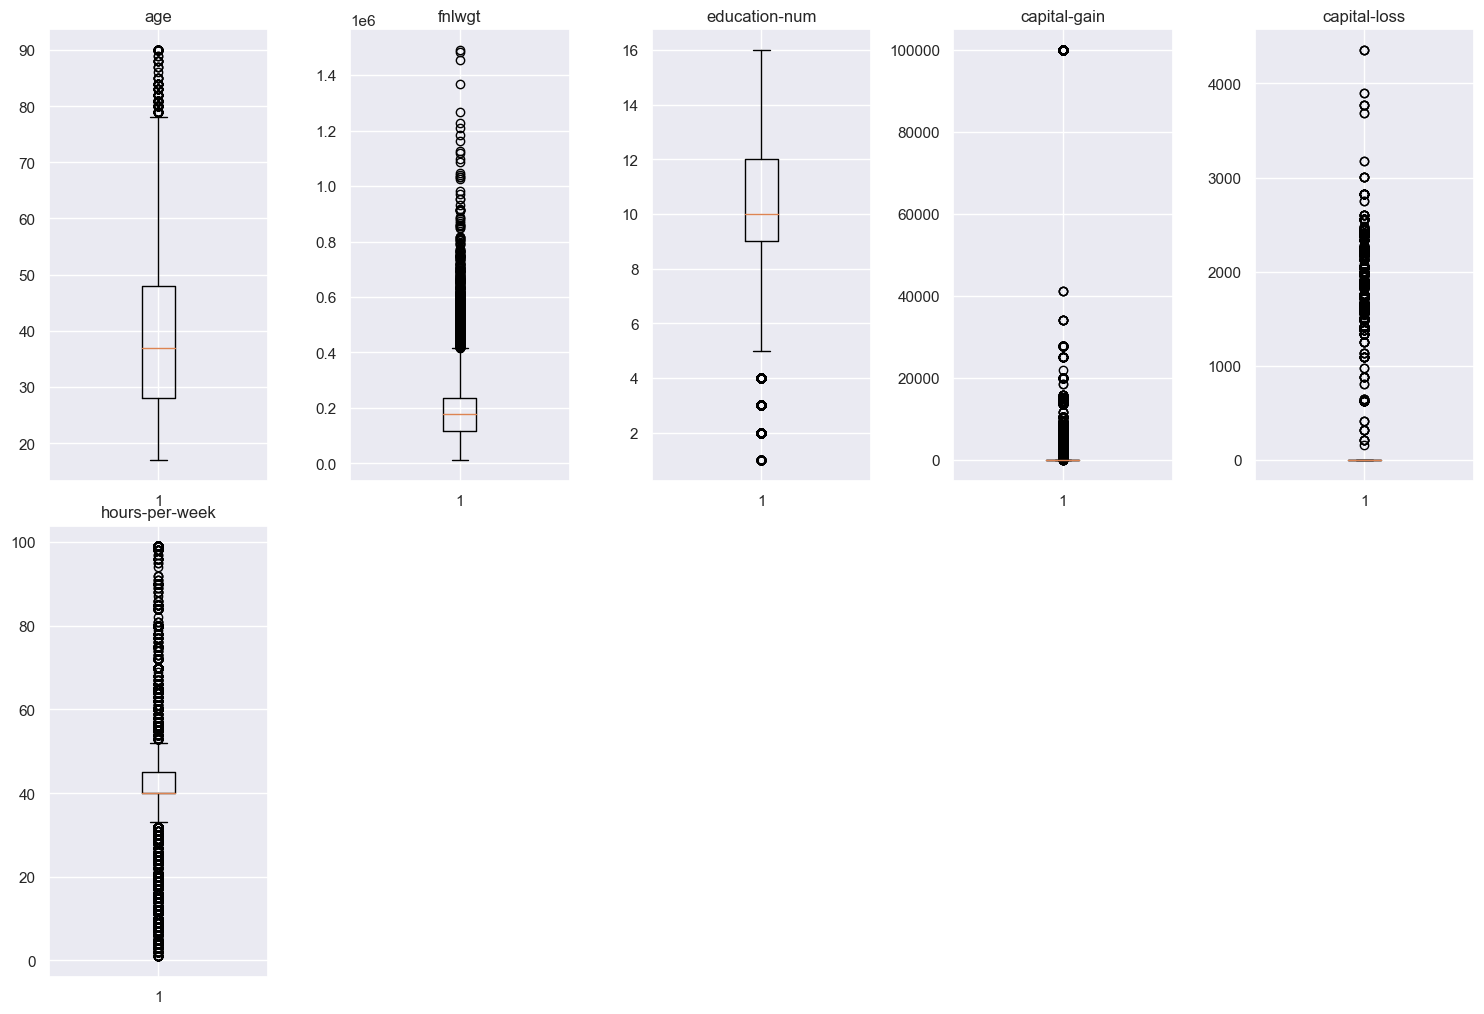

In [28]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status


plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

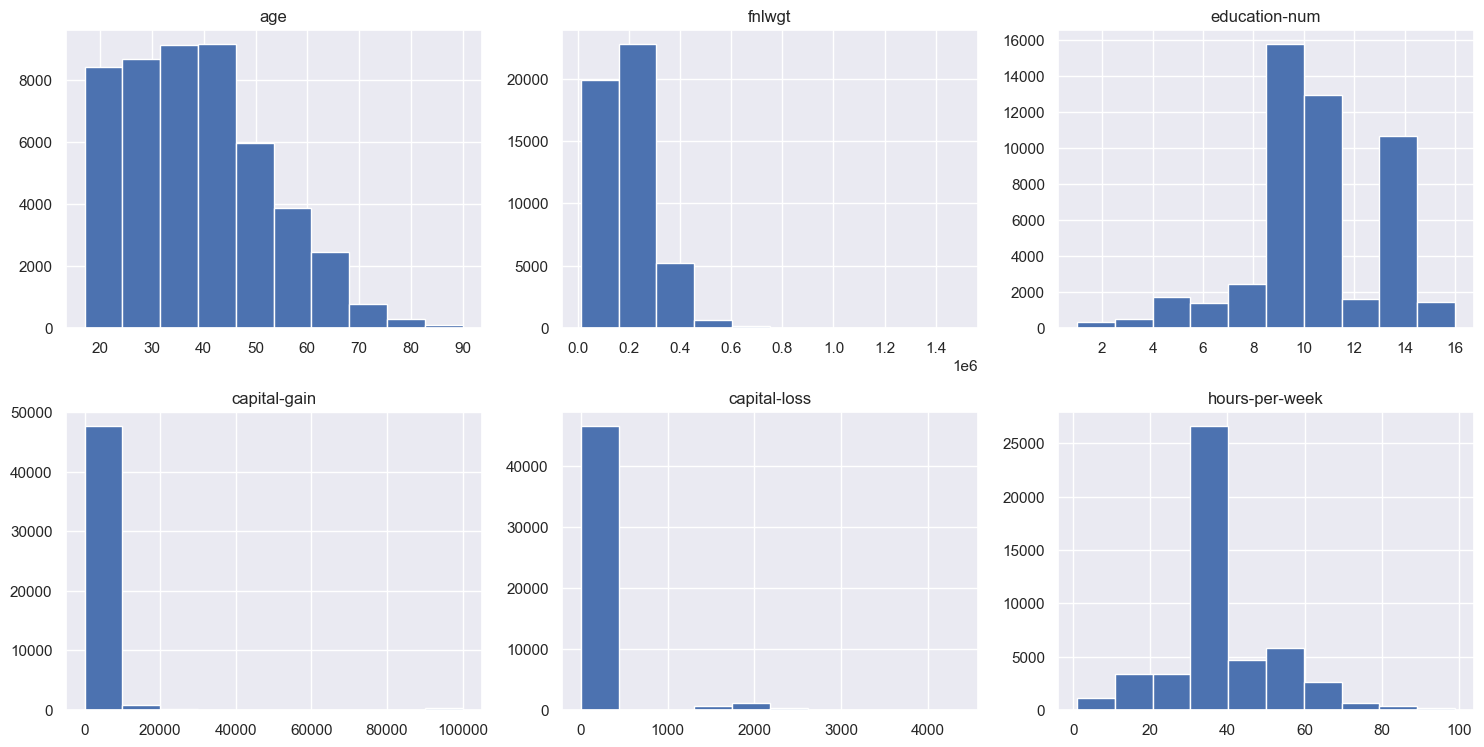

In [29]:
# Histogram to further check the distributions


plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [30]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [31]:
treat_cols = [
    "capital-gain",
    "capital-loss",
    "hours-per-week"
]  

df_outlier_treated = treat_outliers_all(df, treat_cols)

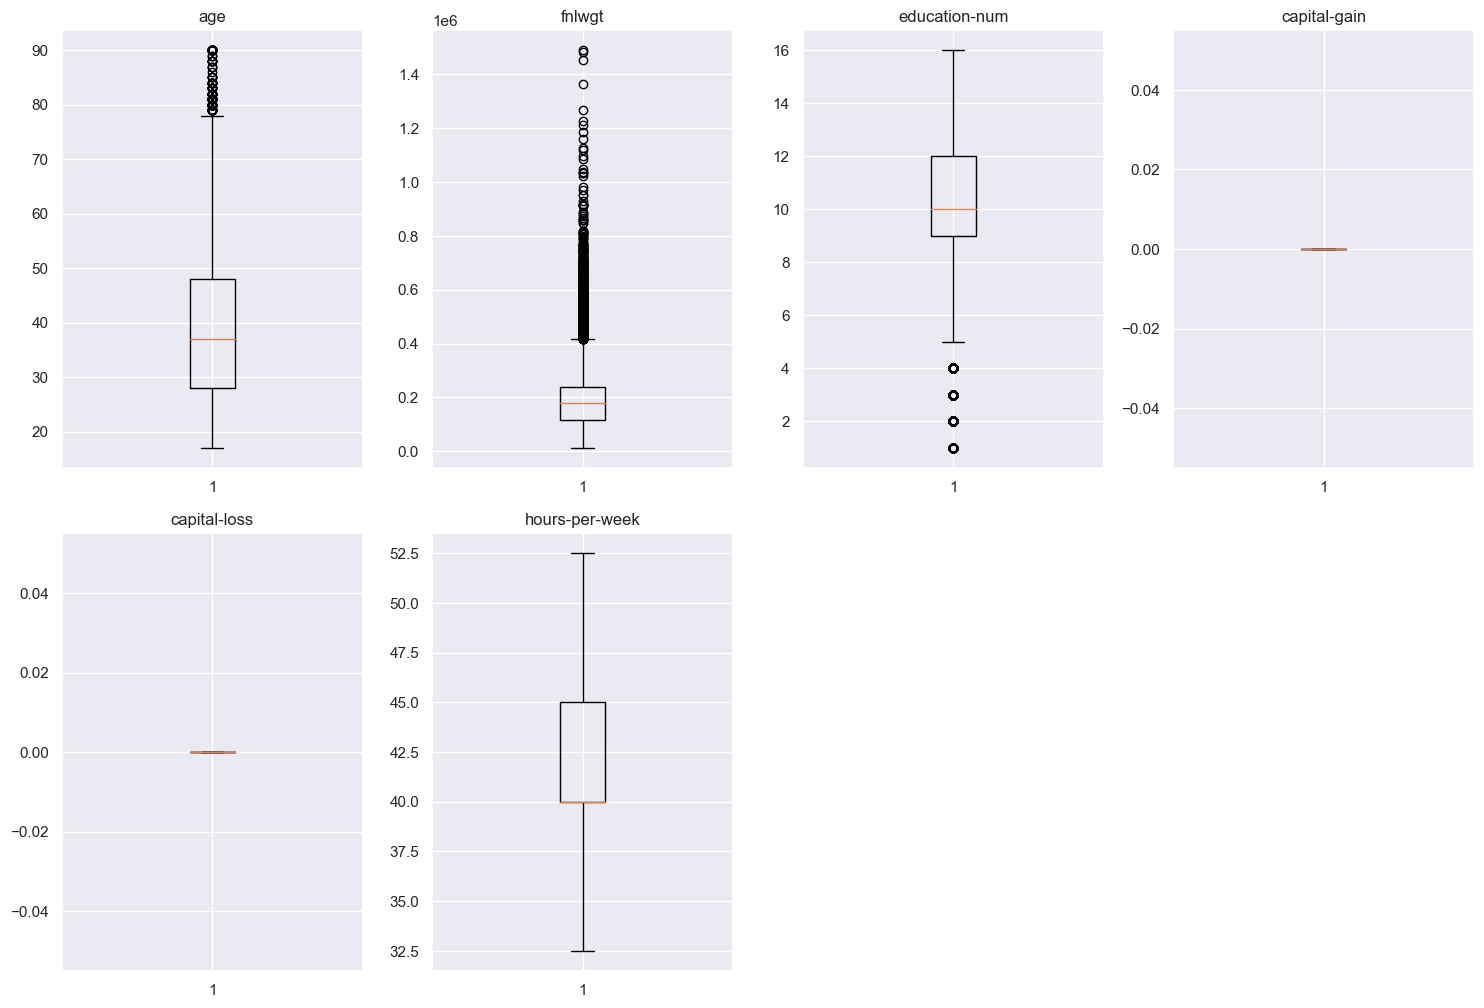

In [32]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_outlier_treated[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Missing Data handling


steps being taken - trying to understand the nature of missing data (MCAR/ MNAR ) 

1. Visual inspection
2. MCAR test
3. Implementing suitable imputation methods based on result of MCAR

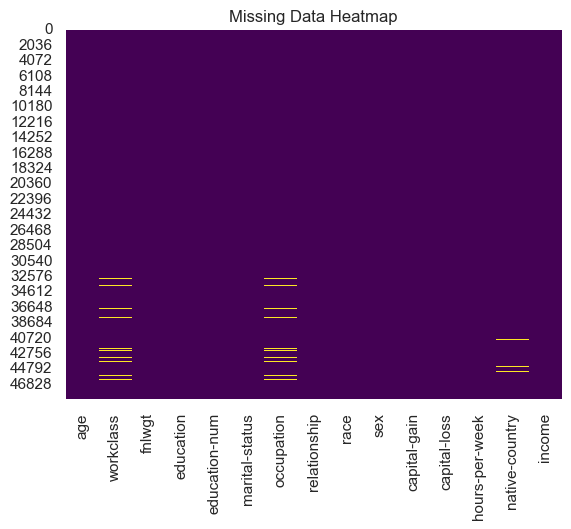

In [33]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [34]:
# Check missing rates by other categories
print(df.groupby('sex')['occupation'].apply(lambda x: x.isnull().mean()))
print(df.groupby('age')['workclass'].apply(lambda x: x.isnull().mean()))


sex
Female    0.026680
Male      0.016355
Name: occupation, dtype: float64
age
17    0.055462
18    0.071926
19    0.066477
20    0.061995
21    0.052920
        ...   
86    0.000000
87    0.333333
88    0.000000
89    0.500000
90    0.018182
Name: workclass, Length: 74, dtype: float64


In [37]:
from scipy.stats import chi2  # Import chi2 from scipy.stats for the chi-squared distribution

In [39]:
# Define a function to perform Little's MCAR test
def little_mcar_test(data):
   

    # Convert all columns to numerical codes, treating missing values as -1
    data_converted = df.apply(lambda x: pd.factorize(x, na_sentinel=-1)[0])

    # Calculate observed counts for pairs of columns
    observed_counts = pd.crosstab(data_converted.iloc[:, 0], data_converted.iloc[:, 1])

    # Calculate expected frequencies under the MCAR assumption
    expected_counts = np.outer(observed_counts.sum(axis=1), observed_counts.sum(axis=0)) / observed_counts.sum().sum()

    # Calculate the chi-squared statistic
    chi2_stat = ((observed_counts - expected_counts) ** 2 / expected_counts).sum().sum()

    # Degrees of freedom for the test
    dof = (observed_counts.shape[0] - 1) * (observed_counts.shape[1] - 1)

    # Compute the p-value
    p_value = chi2.sf(chi2_stat, dof)

    print(f"Chi-squared statistic: {chi2_stat:.2f}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("The missing data is not MCAR (Missing Completely at Random).")
    else:
        print("The missing data is likely MCAR (Missing Completely at Random).")

# Example usage with your dataframe 'df'
# Replace the following line with your actual dataset loading
# df = pd.read_csv('census_data.csv')  

# Test Little's MCAR function on occupation and workclass columns
little_mcar_test(df[['occupation', 'workclass']])

Chi-squared statistic: 6623.32
Degrees of freedom: 657
P-value: 0.0000
The missing data is not MCAR (Missing Completely at Random).


### WHAT METHODS CAN BE USED TO IMPUTE MISSING VALUES THAT ARE MISSING NOT AT RANDOM

1) If the missing values are < 5%, the rows can be deleted.
2) Use MCMC 
3) Check contingency table and relationship between income and missing values